Mini Project One : )

Business Quesion:
We need to predict how various factors influence flood probability so that we may be more effective in the land we choose to develop to mitigate risks of flooding. The model should be created within 3 months to account for seasons and then updated yearly.

In [1]:
#First we import everything that we are going use

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import (mean_squared_error, make_scorer, r2_score)
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

%matplotlib inline

In [2]:
#grabbing the data
df = pd.read_csv('../Mini project one/Flood DATA/Flood.csv')

Now we do our EDA

In [5]:
df.head(10)
#With df.head we can see what the table overall looks like, our coloumns and what kind of data we are working with

,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,Encroachments,...,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors,FloodProbability
0,3,8,6,6,4,4,6,2,3,2,...,10,7,4,2,3,4,3,2,6,0.450
1,8,4,5,7,7,9,1,5,5,4,...,9,2,6,2,1,1,9,1,3,0.475
2,3,10,4,1,7,5,4,7,4,9,...,7,4,4,8,6,1,8,3,6,0.515
3,4,4,2,7,3,4,1,4,6,4,...,4,2,6,6,8,8,6,6,10,0.520
4,3,7,5,2,5,8,5,2,7,5,...,7,6,5,3,3,4,4,3,4,0.475
5,6,6,6,4,6,4,3,1,3,5,...,10,5,9,5,5,7,3,3,2,0.470
6,6,7,4,5,5,5,4,8,8,4,...,8,4,5,4,7,7,5,4,8,0.570
7,7,3,5,5,6,6,6,7,6,5,...,4,6,9,7,10,6,5,4,5,0.585
8,6,3,5,4,5,11,3,2,9,7,...,2,8,7,5,4,9,6,5,7,0.580
9,4,3,5,6,2,3,7,7,10,4,...,7,6,5,6,7,5,7,4,8,0.555


In [12]:
df.shape

(50000, 21)

In [7]:
df.info()
#we note that there are no null values in the table and that the dtypes are almost all integer with one coloumn being float

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   MonsoonIntensity                 50000 non-null  int64  
 1   TopographyDrainage               50000 non-null  int64  
 2   RiverManagement                  50000 non-null  int64  
 3   Deforestation                    50000 non-null  int64  
 4   Urbanization                     50000 non-null  int64  
 5   ClimateChange                    50000 non-null  int64  
 6   DamsQuality                      50000 non-null  int64  
 7   Siltation                        50000 non-null  int64  
 8   AgriculturalPractices            50000 non-null  int64  
 9   Encroachments                    50000 non-null  int64  
 10  IneffectiveDisasterPreparedness  50000 non-null  int64  
 11  DrainageSystems                  50000 non-null  int64  
 12  CoastalVulnerabili

In [21]:
df.describe()

,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,Encroachments,...,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors,FloodProbability
count,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000,50000.000000,...,50000.000000,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000,50000.000000
mean,4.991480,4.984100,5.01594,5.008480,4.989060,4.988340,5.01536,4.988600,5.006120,5.006380,...,5.006060,4.999920,4.984220,4.97982,4.988200,4.984980,5.00512,4.994360,4.990520,0.499660
std,2.236834,2.246488,2.23131,2.222743,2.243159,2.226761,2.24500,2.232642,2.234588,2.241633,...,2.238107,2.247101,2.227741,2.23219,2.231134,2.238279,2.23176,2.230011,2.246075,0.050034
min,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,0.285000
25%,3.000000,3.000000,3.00000,3.000000,3.000000,3.000000,3.00000,3.000000,3.000000,3.000000,...,3.000000,3.000000,3.000000,3.00000,3.000000,3.000000,3.00000,3.000000,3.000000,0.465000
50%,5.000000,5.000000,5.00000,5.000000,5.000000,5.000000,5.00000,5.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,5.00000,5.000000,5.000000,5.00000,5.000000,5.000000,0.500000
75%,6.000000,6.000000,6.00000,6.000000,6.000000,6.000000,6.00000,6.000000,6.000000,6.000000,...,6.000000,6.000000,6.000000,6.00000,6.000000,6.000000,6.00000,6.000000,6.000000,0.535000
max,16.000000,18.000000,16.00000,17.000000,17.000000,17.000000,16.00000,16.000000,16.000000,18.000000,...,17.000000,17.000000,16.000000,16.00000,17.000000,19.000000,22.00000,16.000000,16.000000,0.725000


In [ ]:
#boxplot for outliers

Now let's do some graphs

C:\Users\Heidi\anaconda3\envs\IOD\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Heidi\anaconda3\envs\IOD\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Heidi\anaconda3\envs\IOD\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Heidi\anaconda3\envs\IOD\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Conver

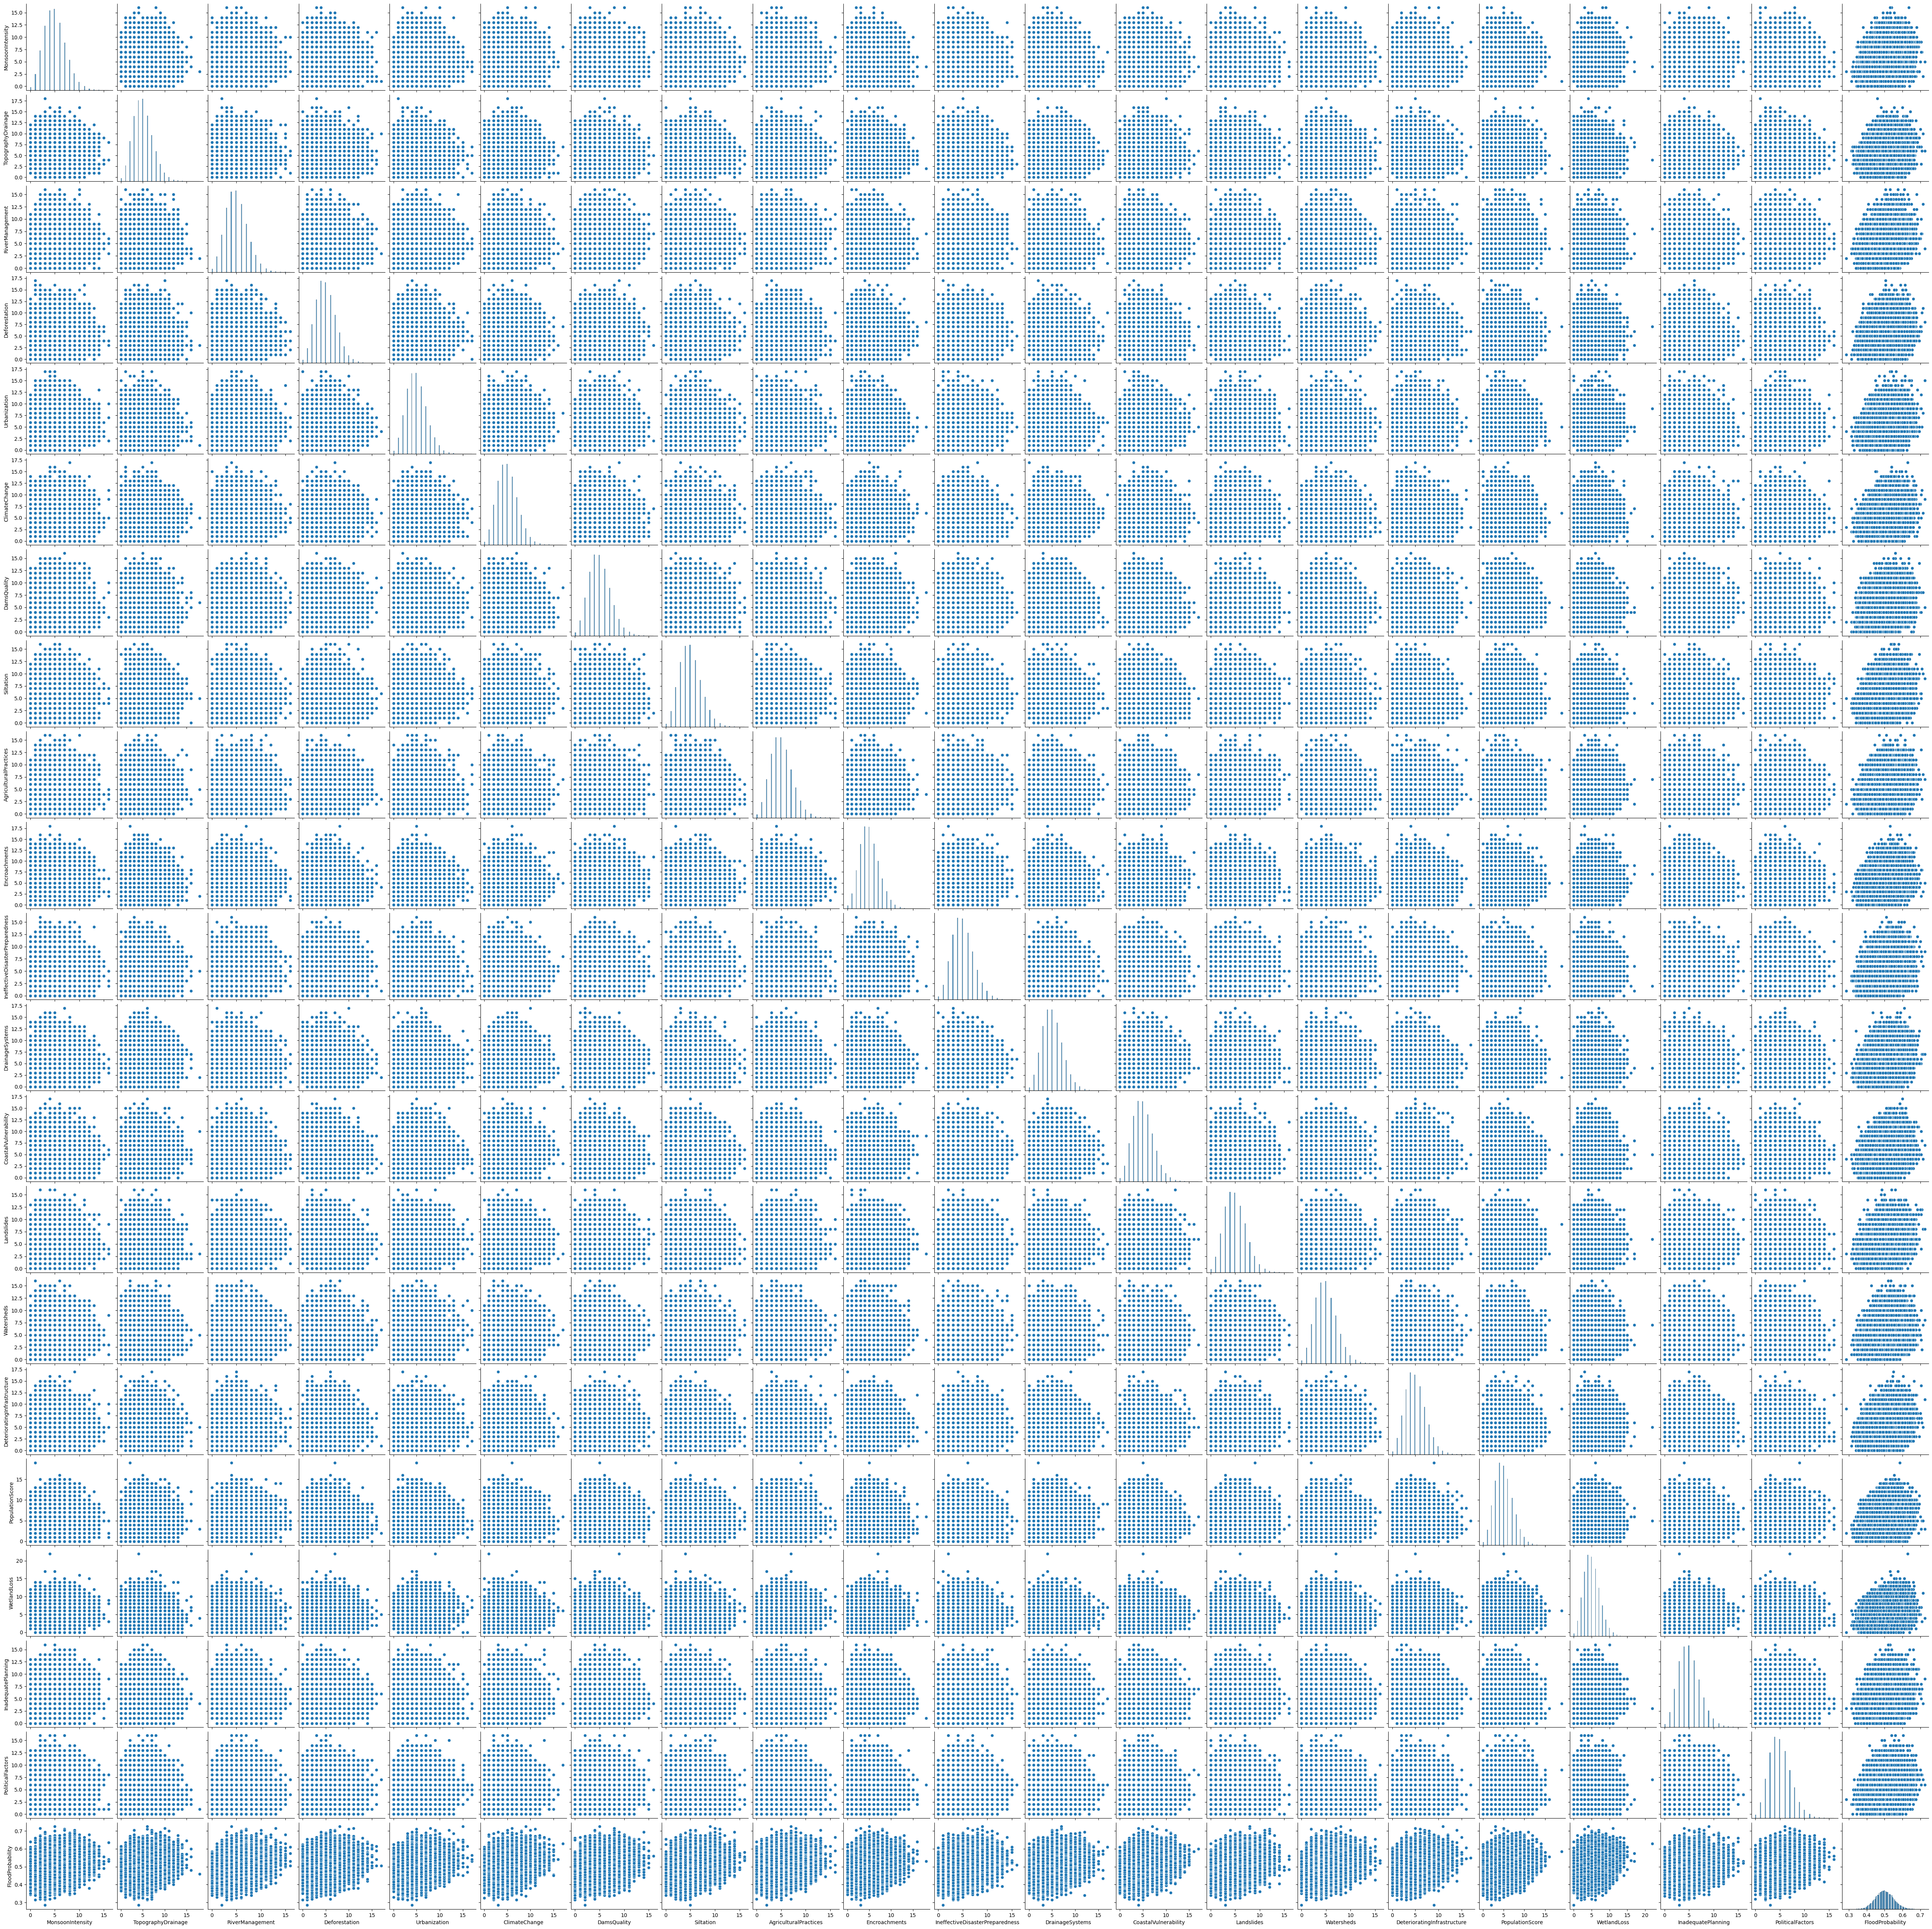

In [22]:
sns.pairplot(df)
#we can see a lot of different graphs here but it's difficult to see any correlations

In [23]:
df.corr()
#It's not super obvious which is correlating so we can do a heat map

,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,Encroachments,...,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors,FloodProbability
MonsoonIntensity,1.000000,-0.003470,0.002247,-0.005384,0.005092,0.005959,0.002790,-0.003191,0.002723,-0.003723,...,-0.000118,-0.004600,-0.002315,-0.008859,0.001763,-0.003597,0.005938,0.003455,0.005402,0.224081
TopographyDrainage,-0.003470,1.000000,0.002492,0.002046,0.000116,-0.002288,-0.004472,0.010675,-0.004550,-0.007272,...,-0.001608,-0.000717,-0.002040,0.005312,0.003654,0.005887,0.003515,0.005276,0.008191,0.229414
RiverManagement,0.002247,0.002492,1.000000,0.004808,-0.009651,0.007199,0.007697,-0.000389,0.003635,0.009253,...,0.002171,-0.000111,-0.004339,0.000097,0.000604,-0.001382,0.002012,0.000364,-0.006323,0.228917
Deforestation,-0.005384,0.002046,0.004808,1.000000,-0.011325,0.000517,-0.000728,-0.000823,0.002929,-0.003507,...,-0.001060,-0.003019,0.005258,0.002171,-0.002093,0.000138,-0.000718,-0.001108,0.001242,0.220237
Urbanization,0.005092,0.000116,-0.009651,-0.011325,1.000000,0.007478,0.000268,-0.001287,-0.001391,-0.011386,...,-0.005281,-0.000881,-0.000651,-0.003479,0.004222,0.002154,0.013263,-0.000864,-0.002418,0.220867
ClimateChange,0.005959,-0.002288,0.007199,0.000517,0.007478,1.000000,-0.002889,0.001514,-0.003362,0.000075,...,-0.007587,-0.001467,0.000689,0.003023,0.003281,-0.008334,-0.000547,-0.000186,-0.004453,0.220986
DamsQuality,0.002790,-0.004472,0.007697,-0.000728,0.000268,-0.002889,1.000000,0.003239,0.001743,0.001638,...,0.004165,-0.009503,0.000436,0.005322,-0.004001,0.006856,-0.000662,0.001535,0.001699,0.227467
Siltation,-0.003191,0.010675,-0.000389,-0.000823,-0.001287,0.001514,0.003239,1.000000,-0.003911,0.000158,...,-0.008296,-0.003564,-0.001866,0.003682,0.003045,-0.002484,0.007903,0.011918,-0.001597,0.226544
AgriculturalPractices,0.002723,-0.004550,0.003635,0.002929,-0.001391,-0.003362,0.001743,-0.003911,1.000000,-0.006564,...,0.000648,-0.003708,0.004142,0.004371,0.003248,0.001678,-0.007963,-0.002221,-0.001280,0.221846
Encroachments,-0.003723,-0.007272,0.009253,-0.003507,-0.011386,0.000075,0.001638,0.000158,-0.006564,1.000000,...,-0.005960,-0.006591,-0.003032,0.003679,0.002774,0.003874,0.005706,0.001380,-0.007547,0.218259


<Axes: >

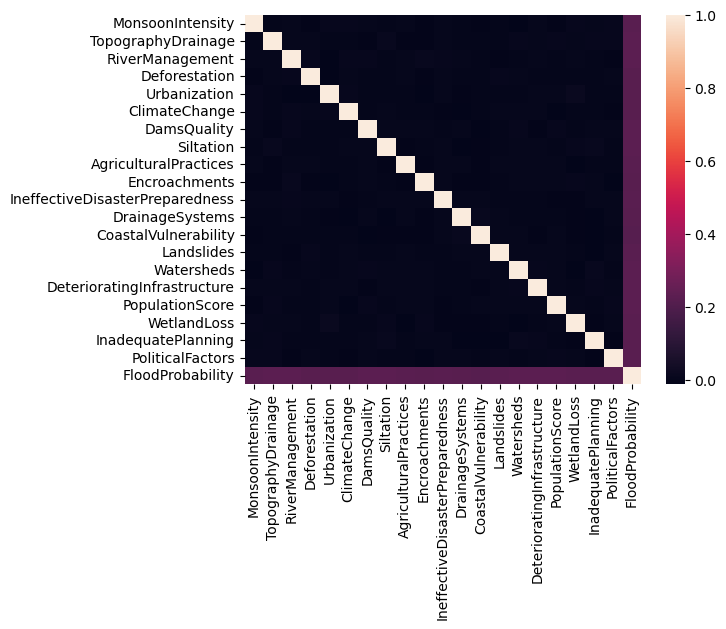

In [25]:
sns.heatmap(df.corr())

looks as though there are no correlations with each other, however all are somewhat correlated with Flood Probability.
As all features are somewhat correlated we can use the previous corr table and pick DeterioratingInfrastructure, Watersheds, TopographyDrainage, and RiverManagement as out features as they are the ones that are the most highly correlated in terms of raw numbers.

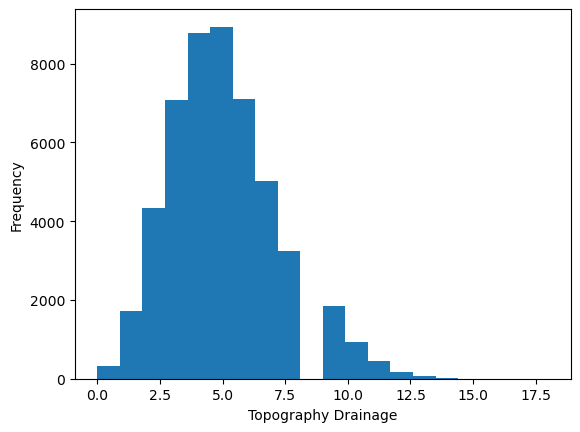

In [68]:
plt.hist(df['TopographyDrainage'],bins=20)
plt.xlabel('Topography Drainage')
plt.ylabel('Frequency')
plt.show()

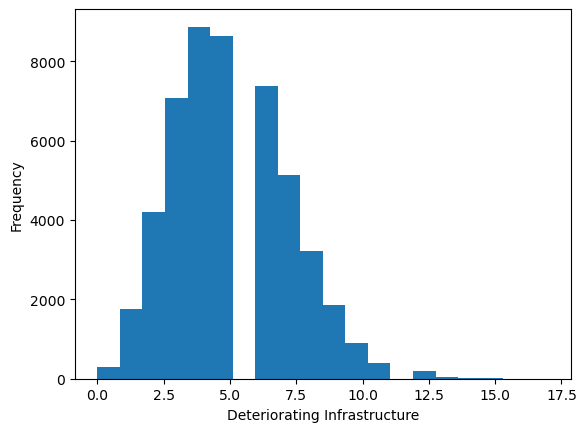

In [70]:
plt.hist(df['DeterioratingInfrastructure'],bins=20)
plt.xlabel('Deteriorating Infrastructure')
plt.ylabel('Frequency')
plt.show()

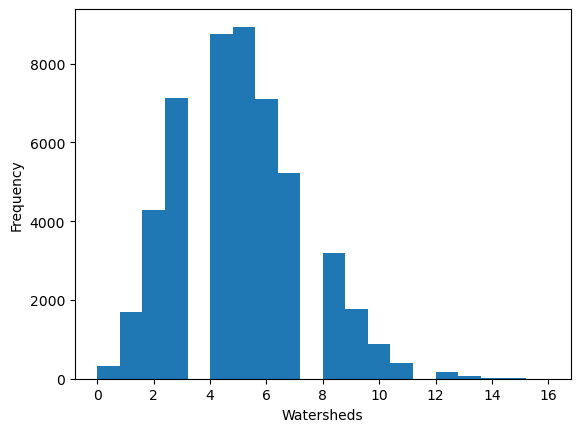

In [71]:
plt.hist(df['Watersheds'],bins=20)
plt.xlabel('Watersheds Infrastructure')
plt.ylabel('Frequency')
plt.show()

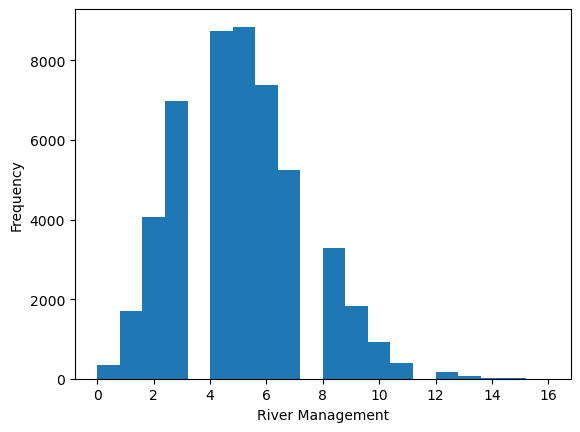

In [72]:
plt.hist(df['RiverManagement'],bins=20)
plt.xlabel('River Management')
plt.ylabel('Frequency')
plt.show()

Next is to write the model

In [53]:
X = df[['TopographyDrainage' , 'DeterioratingInfrastructure' , 'Watersheds' , 'RiverManagement']]
y = df['FloodProbability']

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [55]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [56]:
model.score(X_train, y_train)

0.20734631721104746

In [57]:
model.score(X_test, y_test)

0.2091820458252931

In [58]:
model.coef_

array([0.0049045 , 0.00515234, 0.00502135, 0.00516751])

In [59]:
model.intercept_

0.3985443473694027

In [60]:
y_pred = model.predict(X_test)
y_pred

array([0.479644  , 0.52454525, 0.46417181, ..., 0.49497003, 0.46986431,
       0.49497003])

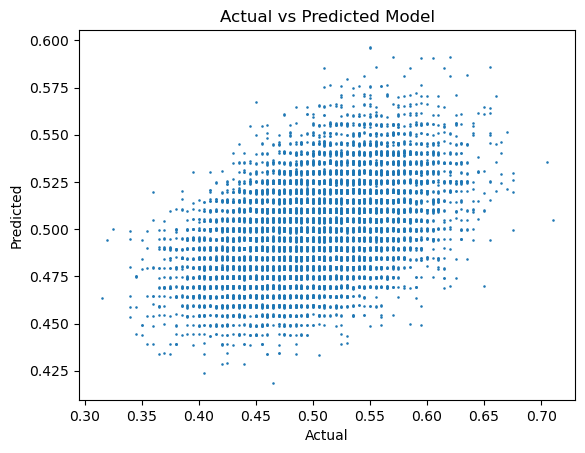

In [61]:
plt.scatter(y_test, y_pred, s=0.7)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Model')
plt.show()
#what is the next step after the model
#can test teh mdoel (lab 4.1.1) question 3 predict the house price - giving the model values and seeing what te result is to look at he viability of the model

Model Evaluation

In [62]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [77]:
r2_score(y_test, y_pred)
#low varience in the features
#potentially outsliers issue
#also possiblity of a non linear relationship
#to mitigate these problems you can incoporate another dataset into the model

0.2091820458252931

In [78]:
mean_squared_error(y_test, y_pred, squared=True)

0.001997627900705605

In [79]:
mean_absolute_error(y_test, y_pred)

0.03568386807954468